In [4]:
# Importazione delle librerie necessarie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Caricamento del dataset Iris
iris = load_iris()
X = iris.data[:, 2:]  # Utilizziamo solo le prime due caratteristiche per una visualizzazione 2D
y = iris.target

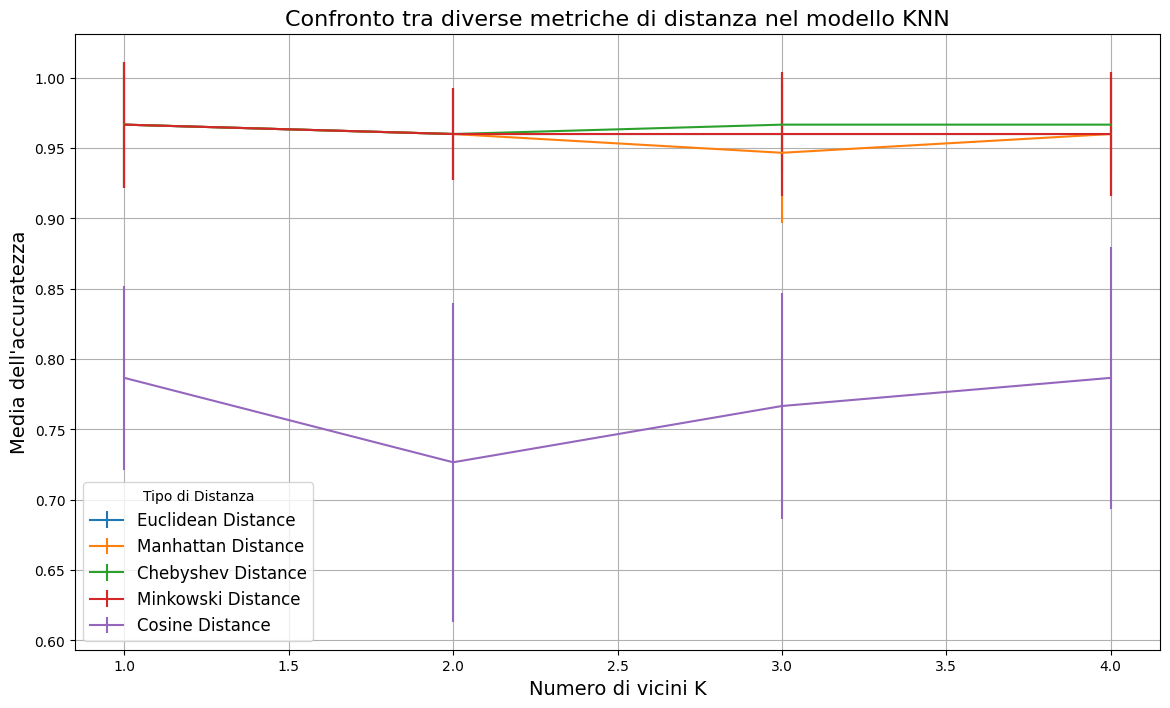

In [5]:
# Divisione del dataset in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definiamo i diversi tipi di distanza da testare
distances = {
    'Euclidean': 'euclidean',
    'Manhattan': 'manhattan',
    'Chebyshev': 'chebyshev',
    'Minkowski': 'minkowski',
    'Cosine': 'cosine'
}

# Numero di vicini da testare
k_values = range(1, 5)

# Inizializzazione delle strutture dati per memorizzare i risultati
results = {key: [] for key in distances.keys()}
results_std = {key: [] for key in distances.keys()}

# Creazione dei modelli e valutazione delle performance
for name, metric in distances.items():
    for k in k_values:
        if metric == 'cosine':
            # Caso speciale per la distanza coseno (Minkowski con p=1 e normalizzazione)
            model = KNeighborsClassifier(n_neighbors=k, metric=metric)
        else:
            model = KNeighborsClassifier(n_neighbors=k, metric=metric)
        # Valutazione tramite cross-validation
        scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
        results[name].append(np.mean(scores))
        results_std[name].append(np.std(scores))

# Plotting dei risultati
plt.figure(figsize=(14, 8))

for name in distances.keys():
    plt.errorbar(k_values, results[name], yerr=results_std[name], label=f"{name} Distance")

plt.title("Confronto tra diverse metriche di distanza nel modello KNN", fontsize=16)
plt.xlabel("Numero di vicini K", fontsize=14)
plt.ylabel("Media dell'accuratezza", fontsize=14)
plt.legend(title="Tipo di Distanza", fontsize=12)
plt.grid(True)
plt.show()